In [1]:
# Load trainingSet.csv
import pandas as pd

train = pd.read_csv('data/trainingSet.csv', dtype=str)

In [2]:
# Load example scans and plot annotated slice
from data_util import load_image
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# Pick a couple of random scans
patients = train.sample(5)

for i, p in patients.iterrows():
    # Plot the scan, draw circle around body and list histology in upper-left
    img = load_image(p.patientID, p.studyID, p.scanName)
    ann = p[['annotationLowResolution{}'.format(i) for i in range(1, 4)]].values.astype(np.uint8)
    plt.figure()
    plt.imshow(img[..., ann[-1]], cmap='gray')
    plt.scatter(*ann[:-1], edgecolors='r', facecolors='none', s=1000)
    plt.text(10, 20, p.histology, fontdict={'color': 'r',
                                            'size': 'large',
                                            'weight': 'bold',
                                           })

RuntimeError: Exception thrown in SimpleITK ReadImage: /tmp/SimpleITK/Code/IO/src/sitkImageReaderBase.cxx:89:
sitk::ERROR: The file "./data/train/02002173/st01/v0200217301sr.mhd" does not exist.

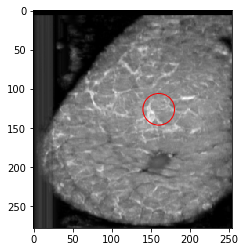

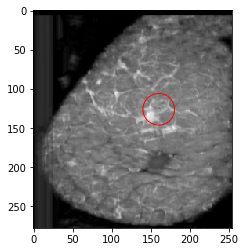

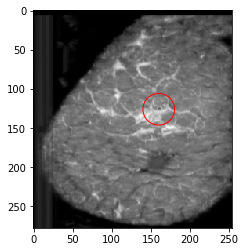

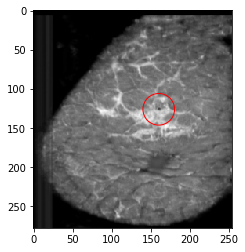

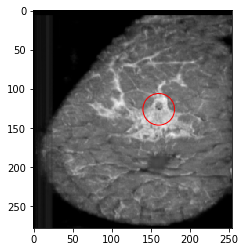

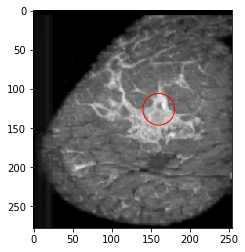

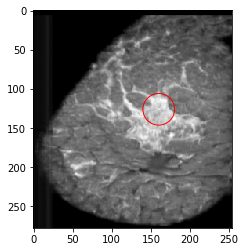

In [3]:
# Plot a few slices around the annotation:
p = train.loc[2]

img = load_image(p.patientID, p.studyID, p.scanName)
ann = p[['annotationLowResolution{}'.format(i) for i in range(1, 4)]].values.astype(np.uint8)
r = 3 # range around annotation slice
for i in range(ann[-1]-r, ann[-1]+r+1):
    plt.figure()
    plt.imshow(img[..., i], cmap='gray')
    plt.scatter(*ann[:-1], edgecolors='r', facecolors='none', s=1000)